
# PyCaret Clustering Tutorial



#  Installation



In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 86.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. Thi

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

PyCaret's Clustering Module is an unsupervised machine learning module that performs the task of grouping a set of objects in such a way that objects in the same group (also known as a cluster) are more similar to each other than to those in other groups.



### **Setup** ➡️ **Create Model** ➡️ **Assign Labels** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has one required parameter i.e. `data`. All the other parameters are optional.

In [ ]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(768, 9)"
2,Transformed data shape,"(768, 9)"
3,Numeric features,9
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed data shape:**  Shape of data after transformations <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [ ]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [ ]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(768, 9)"
2,Transformed data shape,"(768, 9)"
3,Numeric features,9
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Create Model

This function trains and evaluates the performance of a given model. Metrics evaluated can be accessed using the `get_metrics` function. Custom metrics can be added or removed using the `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [ ]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4251,1120.2916,0.7565,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6046,331.7479,0.4896,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Assign Model
This function assigns cluster labels to the training data, given a trained model.

In [ ]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Cluster
0,6,148,72,35,0,33.599998,0.627,50,1,Cluster 3
1,1,85,66,29,0,26.600000,0.351,31,0,Cluster 3
2,8,183,64,0,0,23.299999,0.672,32,1,Cluster 3
3,1,89,66,23,94,28.100000,0.167,21,0,Cluster 0
4,0,137,40,35,168,43.099998,2.288,33,1,Cluster 2
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900002,0.171,63,0,Cluster 2
764,2,122,70,27,0,36.799999,0.340,27,0,Cluster 3
765,5,121,72,23,112,26.200001,0.245,30,0,Cluster 0
766,1,126,60,0,0,30.100000,0.349,47,1,Cluster 3


## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [ ]:
# plot pca cluster plot
plot_model(kmeans, plot = 'cluster')

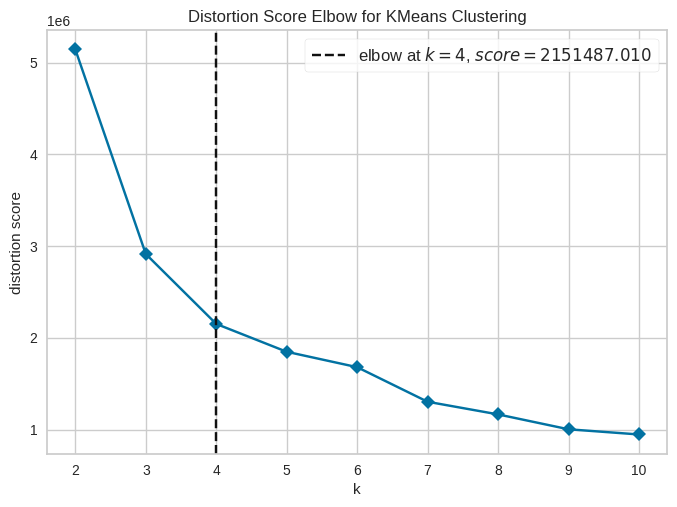

In [ ]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

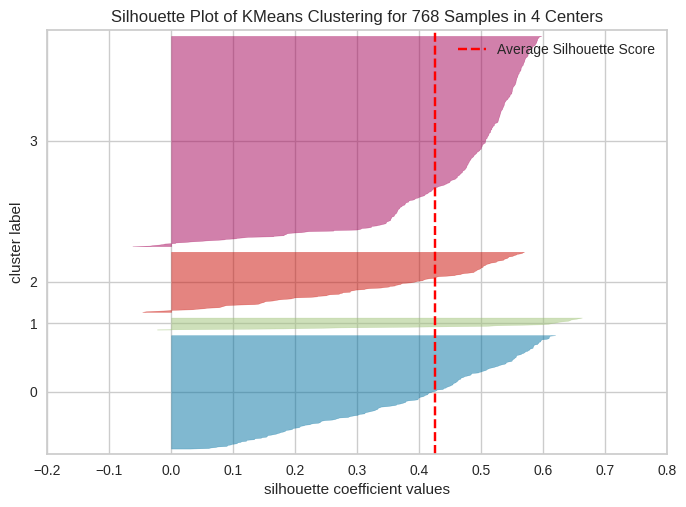

In [ ]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

In [ ]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [ ]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `Cluster` label as a new column in the input dataframe. This step may or may not be needed depending on the use-case. Some times clustering models are trained for analysis purpose only and the interest of user is only in assigned labels on the training dataset, that can be done using `assign_model` function. `predict_model` is only useful when you want to obtain cluster labels on unseen data (i.e. data that was not used during training the model).

In [ ]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Cluster
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,Cluster 3
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,Cluster 3
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,Cluster 3
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Cluster 0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Cluster 2
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,Cluster 2
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,Cluster 3
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,Cluster 0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0,Cluster 3


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigree function',
                                              'Age (years)', 'Class variable'],
                                     transformer=SimpleImputer())),
              

In [ ]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diabetes pedigree function',
                                             'Age (years)', 'Class variable'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])